<a href="https://colab.research.google.com/github/Jovania/Projetos-01/blob/master/Hist3Gray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import das bibliotecas

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
import math
#import statistics as stat
from scipy import stats
import os
from glob import glob
import pandas as pd
import PIL #manipulação de imagens
from PIL import Image
%matplotlib inline 


In [37]:
def imgResize (imagem, parametro, larg, alt):
    img = cv2.imread(imagem, parametro)
    print("dentro do resize")
    plt.imshow(img)
    plt.show()
  # print(img)
    print(img.shape)
   # Necessário a padronização das dimensões da imagem
    img_redim = cv2.resize(img, (larg,alt), interpolation=cv2.INTER_LINEAR)
    print("imagem redimensionada")
    plt.imshow(img_redim)
    plt.show()
    print(img.shape)
    print(img_redim)
    return (img_redim)

**Lendo e exibindo a imagem.**

A função **imread()** possui um segundo argumento que especifica como a imagem deve ser lida.

* cv2.IMREAD_COLOR     = **1**: Le a imagem como **colorida**.

* cv2.IMREAD_GRAYSCALE = **0**: Le a imagem em **escala de cinza**.

* cv2.IMREAD_UNCHANGED = **-1**: Le incluindo o **canal alfa**.


Ler todas as imagens na pasta e plotar


In [38]:
def imgShow(imagem, parametro):

  if parametro == 1:
    img = cv2.imread(imagem, parametro)
    plt.imshow(img)
    plt.show()
    return img
  else:
    # no openCV as imagens são BGR então é necessário converter para RGB
    img = cv2.cvtColor(image.imread(imagem), cv2.COLOR_BGR2RGB)
    img_cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img_cinza,cmap='gray')
    plt.show()
    return img_cinza

# **Dados estatísticos**

*   Dimensões da imagem
*   Valor máximo
*   Valor mínimo


In [39]:
# Dados estatísticos
def imgDim(imagem):
  print("Dimensões da imagem: alt x larg  \n")
  print(imagem.shape)
  print("Valor máximo da imagem   \n")
  print(imagem.max())
  print("Valor mínimo da imagem   \n")
  print(imagem.min())
  return

# **Média**
O valor médio de uma imagem digital é calculado pelo somatório
dos valores de níveis de cinza de todos os píxeis da imagem dividido
pelo número total de píxeis

In [40]:
# Valor médio dos pixeis da imagem
def imgMedia(imagem):
  v_Medio = cv2.mean(imagem)
  print("Media \n")
  print(v_Medio)
  return

# **Variância**

A variância da imagem digital representa o valor de desvio dos níveis
de cinza da imagem em relação ao nível de cinza médio

In [41]:
def imgVariancia(imagem):
  v_variancia = np.var(imagem)
  print("Variancia \n")
  return 

# **Mediana**

A mediana é determinada pelo valor de nível de cinza
que divide a imagem em dois grupos de tamanhos iguais. Para se calcular
este indicador é fundamental uma ordenação dos níveis de cinza da
imagem

In [42]:
def imgMediana(imagem):
  v_Mediana = np.median(imagem)
  print("Mediana \n")
  print(v_Mediana)
  return 

# **Desvio padrão**

O desvio padrão representa a raiz quadrada da variância e informa sobre a
maior ou menor homogeneidade, ou heterogeneidade, de uma imagem
digital.

In [43]:
def imgDesvio(imagem):
  v_DesvioPadrao = np.std(imagem)
  print("Desvio Padrão \n")
  print(v_DesvioPadrao)
  return 

# **Moda**

A moda é o nível de cinza mais frequente na imagem. Para se
calcular este parâmetro é necessário calcular a frequência de todos os
níveis de cinza na imagem e determinar aquele de maior frequência

In [44]:
def imgModa(imagem):
  v_Moda = stats.mode(imagem)
  print("Moda \n")
  print(v_Moda)
  return

# **Co-variância**

A co-variância entre duas ou mais imagens digitais (obrigatoriamente
do mesmo tamanho e resolução), relaciona a presença (ou não) de
redundância de informação entre essas imagens.

A correlação entre duas imagens i e j é definida pela co-variância entre
essas duas imagens e normalizada pelo produto de seus respectivos
desvios padrões.

Este índice de correlação varia entre -1 e 1. Valores próximos a -1 e a 1
indicam alta correlação negativa e positiva, respectivamente. Um valor
próximo a 0 indica baixo índice de correlação entre as imagens, isto é, um
valor alto de um píxel da figura i não significa um valor alto no píxel
correspondente da figura j. 

# **Histograma**

O histograma é um gráfico que relaciona cada valor de nível de cinza
com a sua frequência de aparecimento na imagem digital. 
Eixo "X" = niveis de cinza
Eixo "Y" = frequencia dos pixeis do respectivo nível de cinza


Histogramas com médias baixas = imagens mais escuras
Histogramas com médias altas  = imagens mais claras

Histogramas com desvio padrão baixo = imagens homogêneas (pouca variabilidade)
Histogramas com desvio padrão alto = imagens heterogéneas (grande variabilidade)

*   Qualidade da imagem
*   Intensidade Luminosa
*   Contraste




In [45]:
def imgHistograma (imagem, parametro):
  if parametro == 1:
    plt.hist(imagem.ravel(), 256, [0,256])
    plt.title("Histograma da imagem BGR")
    plt.show()
  else:
    img_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    plt.imshow(img_gray,cmap='gray')
    plt.show()
    plt.hist(img_gray.ravel(), 256, [0,256], color = 'gray')
    plt.title("Histograma da imagem em tons de cinza")
    plt.show() 
    return

Histograma por canal (azul, verde, vermelho)

In [46]:
def imgHistogramChanel (imagem):

    azul, verde, vermelho = cv2.split(imagem)
    
    fig = plt.figure(figsize=(20,5))

    ax1 = fig.add_subplot(131)
    ax1.hist(azul.ravel(), 256, [0,256], color = 'b')
    plt.title("Histograma do canal azul")

    ax2 = fig.add_subplot(132)
    ax2.hist(verde.ravel(), 256, [0,256], color = 'g')
    plt.title("Histograma do canal verde")

    ax3 = fig.add_subplot(133)
    ax3.hist(vermelho.ravel(), 256, [0,256], color = 'r')
    plt.title("Histograma do canal vermelho")

    plt.show()
    return

In [47]:
def imgHistogramaLinhas(imagem):
# img = cv2.imread('path da imagem')
  color = ('b','g','r')
  for i, col in enumerate(color):
	  histr = cv2.calcHist([imagem], [i], None, [256], [0, 256])
	  plt.plot(histr, color = col)
	  plt.xlim([0, 256])

  plt.title("Gráfico da relação dos canais BGR da imagem")
  plt.show()
  return

In [48]:
def imgEqualize(imagem):
  # A equalização de histograma é para apenas 1 canal de cor, então a imagem tem que estar em tons de cinza
    img_gray = cv2.cvtColor(imagem,cv2.COLOR_BGR2GRAY)
    img_eq = cv2.equalizeHist(img_gray)
    plt.hist(img_eq.ravel(), 256, [0,256], color = 'gray')
    plt.title("Histograma tons de cinza equalizado")
    plt.show()
    return

# **INICIO**

Lendo as imagens do diretorio

In [49]:
#Endereco das imagens
caminho = '/content/drive/MyDrive/Cortes/Teste/'
img_names = glob(os.path.join(caminho,'*.png'))

Path da imagem lida
/content/drive/MyDrive/Cortes/Teste/Corte_Cor09_AleatorioA1.png
Mostrando as imagens coloridas e tons de cinza


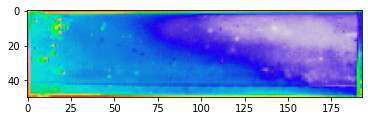

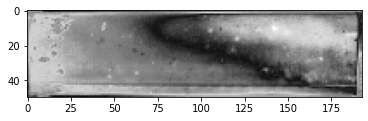

Mostra os dados estatísticos = dimensão, valores máximos e mínimos
Dimensões da imagem: alt x larg  

(50, 193)
Valor máximo da imagem   

0.8725647
Valor mínimo da imagem   

0.25249413
Media 

(0.5619237475753448, 0.0, 0.0, 0.0)
Variancia 

Mediana 

0.57479215
Desvio Padrão 

0.13117845


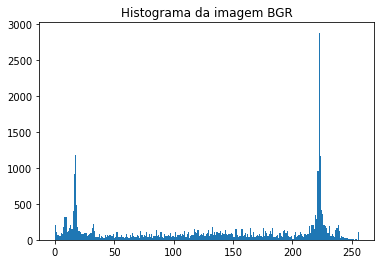

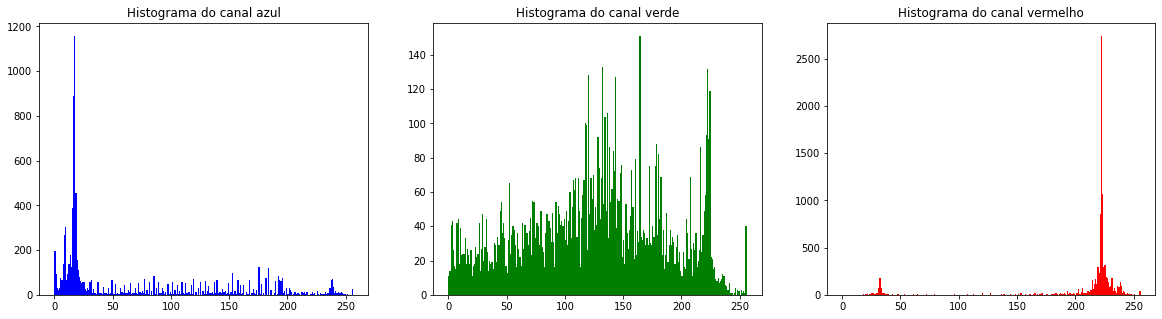

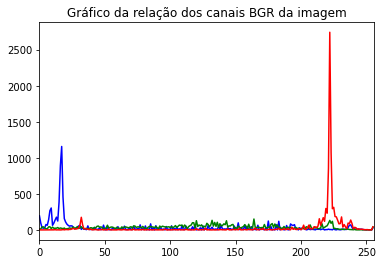

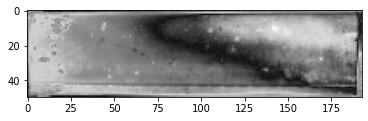

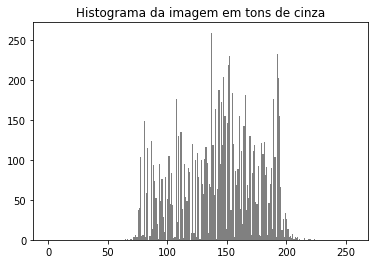

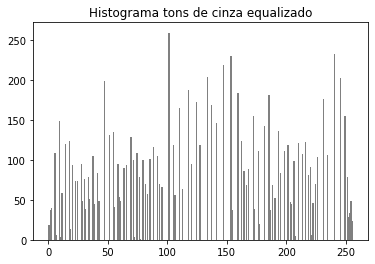

Path da imagem lida
/content/drive/MyDrive/Cortes/Teste/Corte_Cor09_AleatorioB2.png
Mostrando as imagens coloridas e tons de cinza


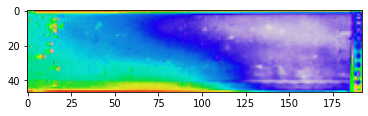

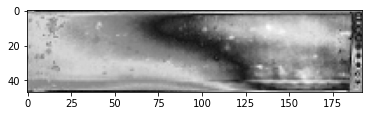

Mostra os dados estatísticos = dimensão, valores máximos e mínimos
Dimensões da imagem: alt x larg  

(47, 192)
Valor máximo da imagem   

0.8608
Valor mínimo da imagem   

0.2356196
Media 

(0.5881363034846115, 0.0, 0.0, 0.0)
Variancia 

Mediana 

0.6116235
Desvio Padrão 

0.13492873


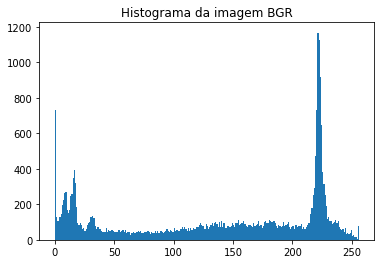

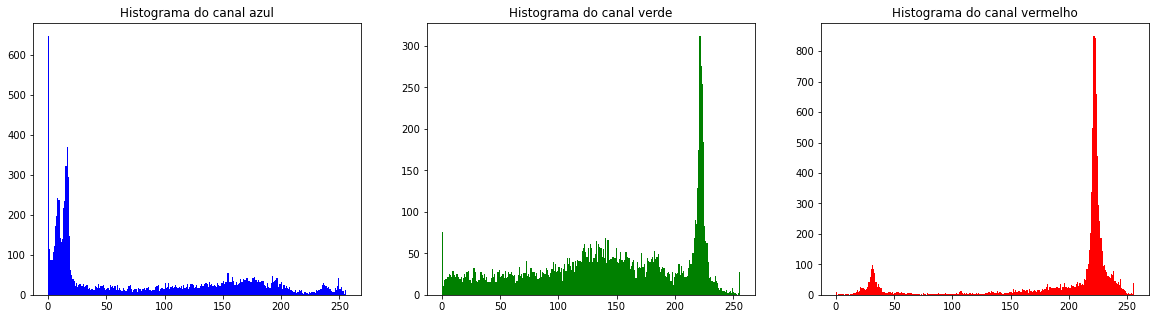

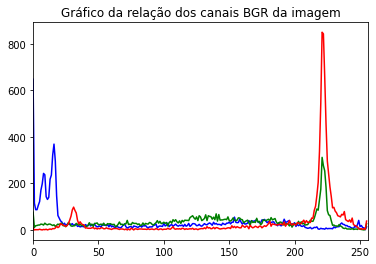

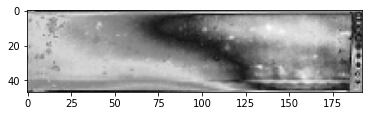

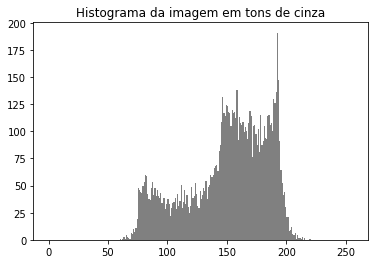

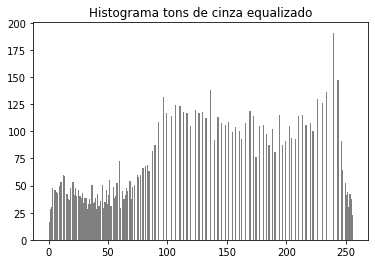

Path da imagem lida
/content/drive/MyDrive/Cortes/Teste/Corte_Cor09_AltoInclDir1.png
Mostrando as imagens coloridas e tons de cinza


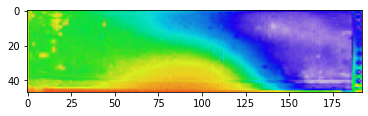

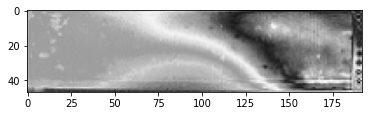

Mostra os dados estatísticos = dimensão, valores máximos e mínimos
Dimensões da imagem: alt x larg  

(47, 192)
Valor máximo da imagem   

0.7858
Valor mínimo da imagem   

0.23292157
Media 

(0.5655300343567703, 0.0, 0.0, 0.0)
Variancia 

Mediana 

0.58132946
Desvio Padrão 

0.10391722


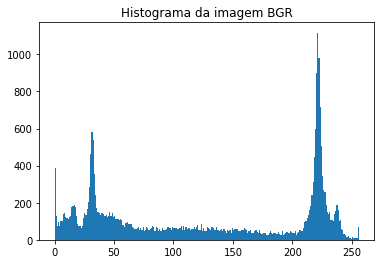

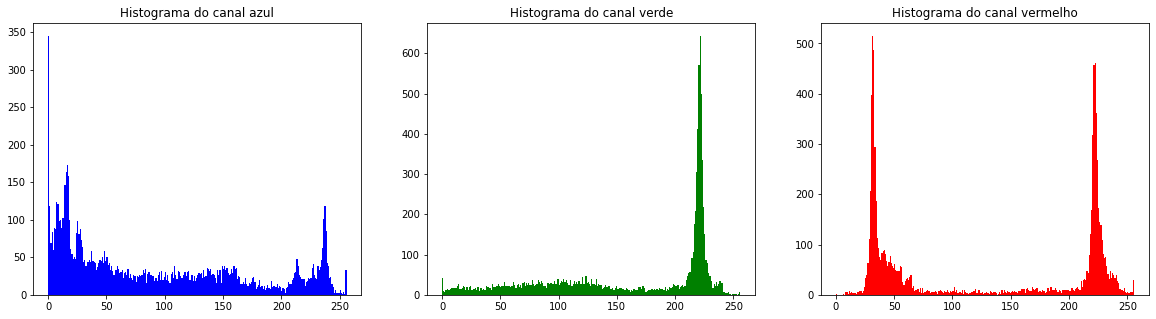

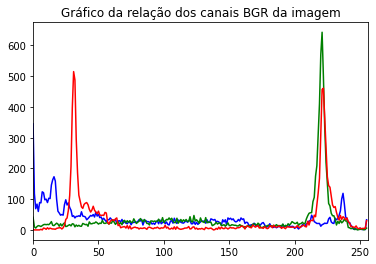

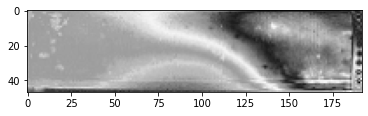

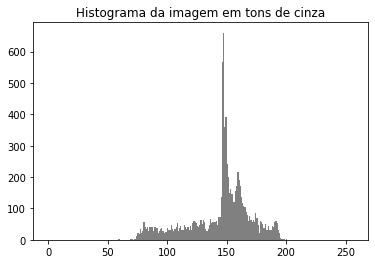

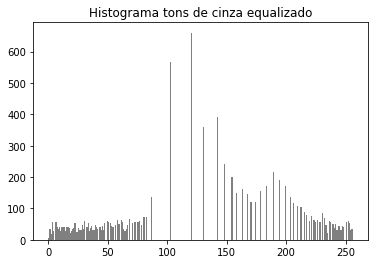

Path da imagem lida
/content/drive/MyDrive/Cortes/Teste/Corte_Cor09_AltoInclEsq1.png
Mostrando as imagens coloridas e tons de cinza


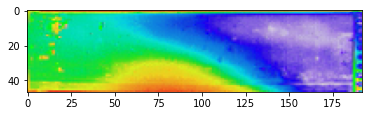

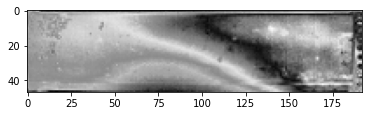

Mostra os dados estatísticos = dimensão, valores máximos e mínimos
Dimensões da imagem: alt x larg  

(47, 192)
Valor máximo da imagem   

0.8275138
Valor mínimo da imagem   

0.2622745
Media 

(0.5784809077257647, 0.0, 0.0, 0.0)
Variancia 

Mediana 

0.5957627
Desvio Padrão 

0.11392682


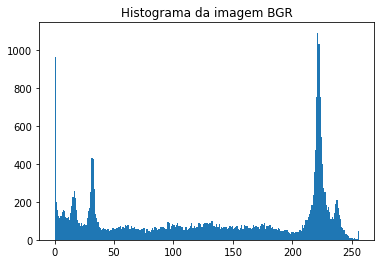

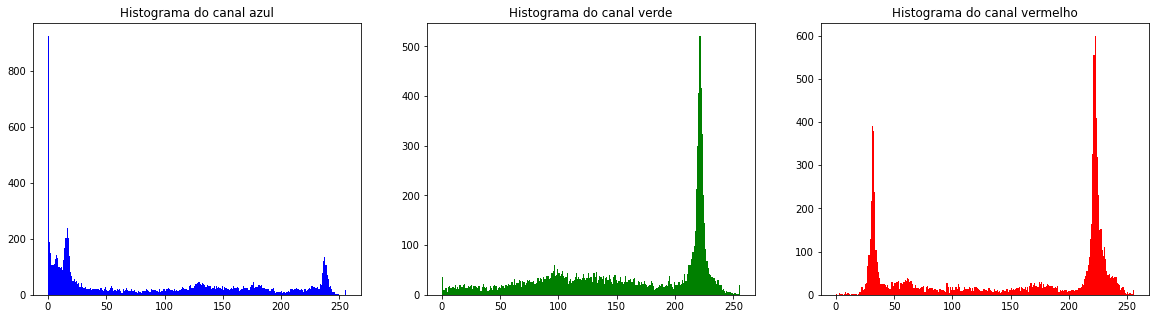

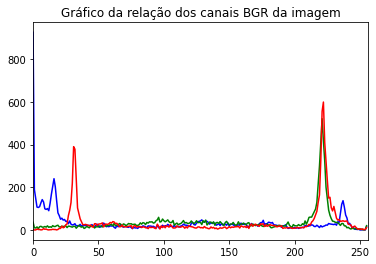

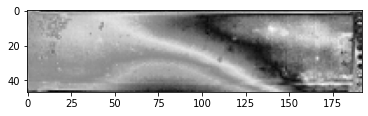

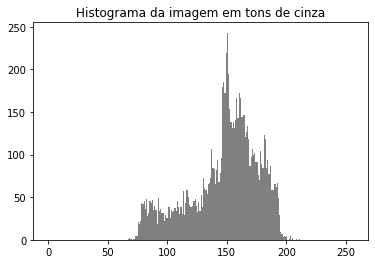

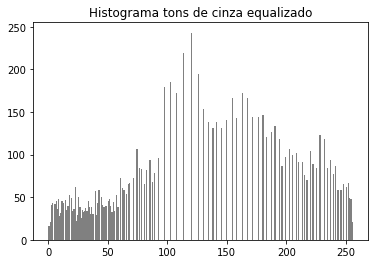

Path da imagem lida
/content/drive/MyDrive/Cortes/Teste/Corte_Cor09_AltoLiso1.png
Mostrando as imagens coloridas e tons de cinza


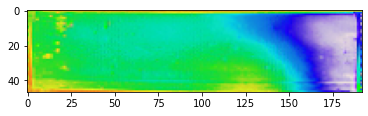

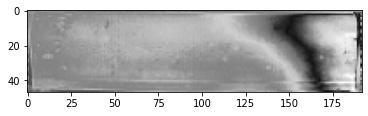

Mostra os dados estatísticos = dimensão, valores máximos e mínimos
Dimensões da imagem: alt x larg  

(47, 192)
Valor máximo da imagem   

0.87864316
Valor mínimo da imagem   

0.24707451
Media 

(0.6206608633675896, 0.0, 0.0, 0.0)
Variancia 

Mediana 

0.62539417
Desvio Padrão 

0.09797089


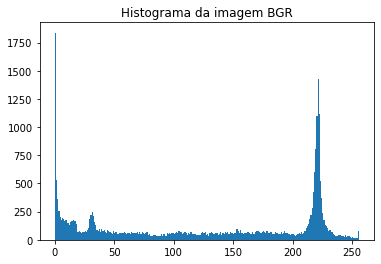

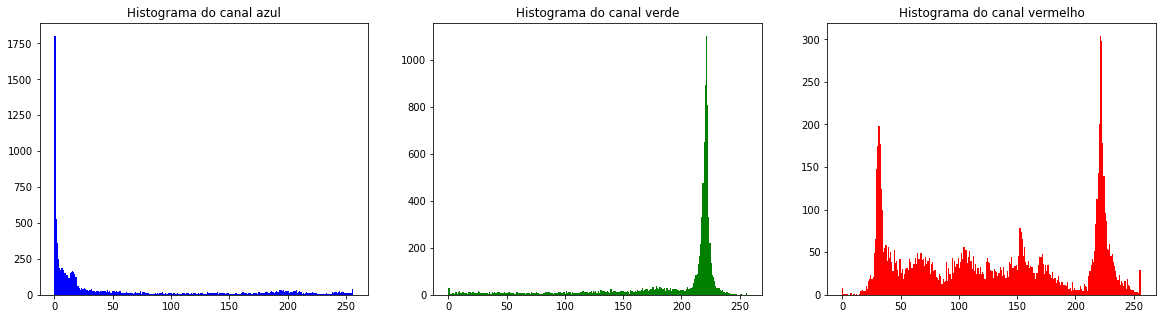

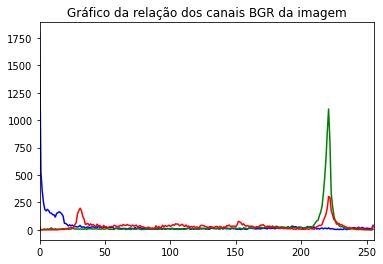

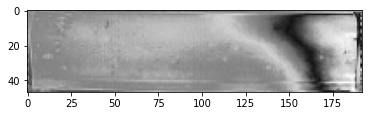

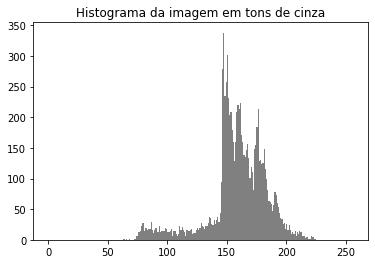

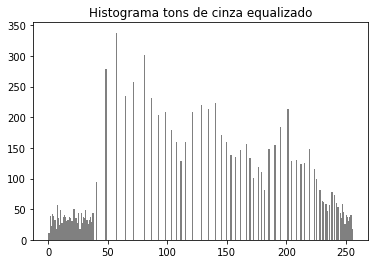

Path da imagem lida
/content/drive/MyDrive/Cortes/Teste/Corte_Cor09_BaixoInclDir1.png
Mostrando as imagens coloridas e tons de cinza


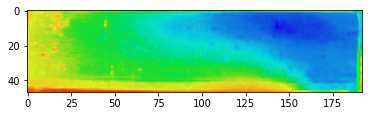

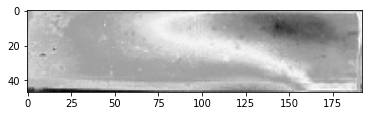

Mostra os dados estatísticos = dimensão, valores máximos e mínimos
Dimensões da imagem: alt x larg  

(47, 192)
Valor máximo da imagem   

0.78063536
Valor mínimo da imagem   

0.22246274
Media 

(0.6084110394866595, 0.0, 0.0, 0.0)
Variancia 

Mediana 

0.6054059
Desvio Padrão 

0.08386451


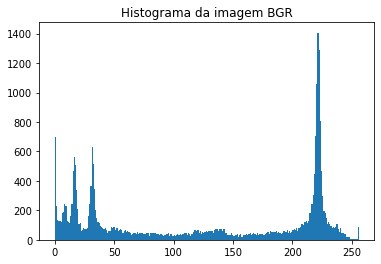

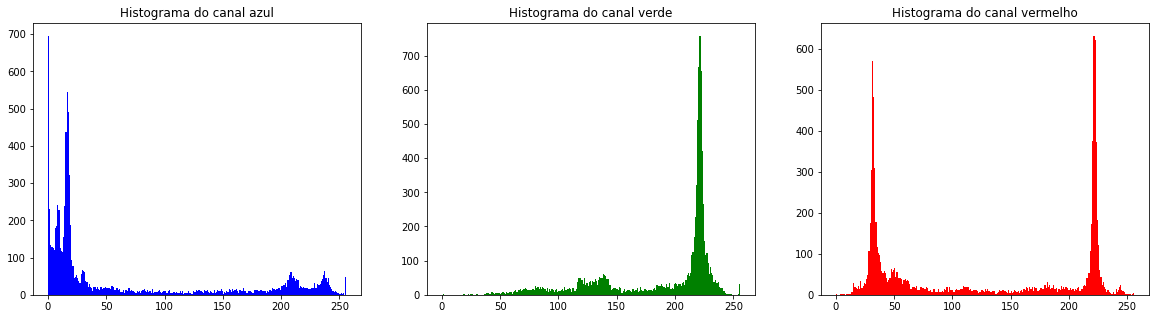

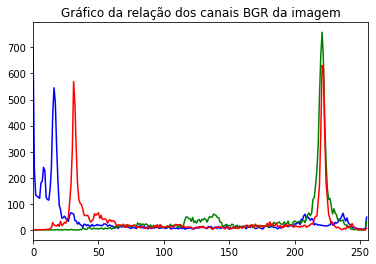

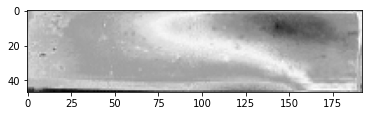

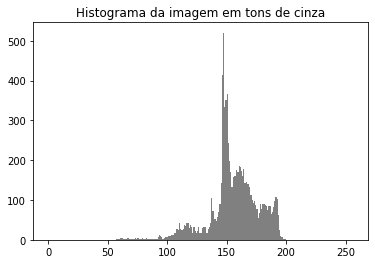

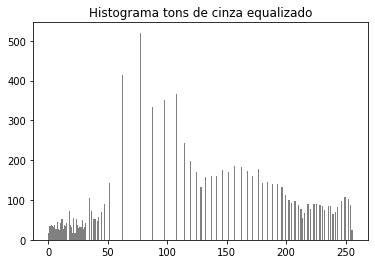

Path da imagem lida
/content/drive/MyDrive/Cortes/Teste/Corte_Cor09_BaixoInclEsq1.png
Mostrando as imagens coloridas e tons de cinza


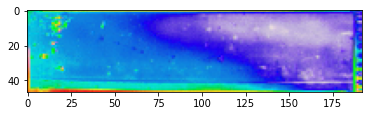

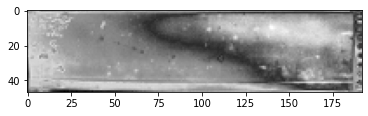

Mostra os dados estatísticos = dimensão, valores máximos e mínimos
Dimensões da imagem: alt x larg  

(47, 192)
Valor máximo da imagem   

0.87320393
Valor mínimo da imagem   

0.17216471
Media 

(0.5622405155845884, 0.0, 0.0, 0.0)
Variancia 

Mediana 

0.5742432
Desvio Padrão 

0.127876


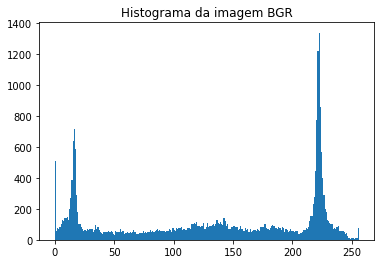

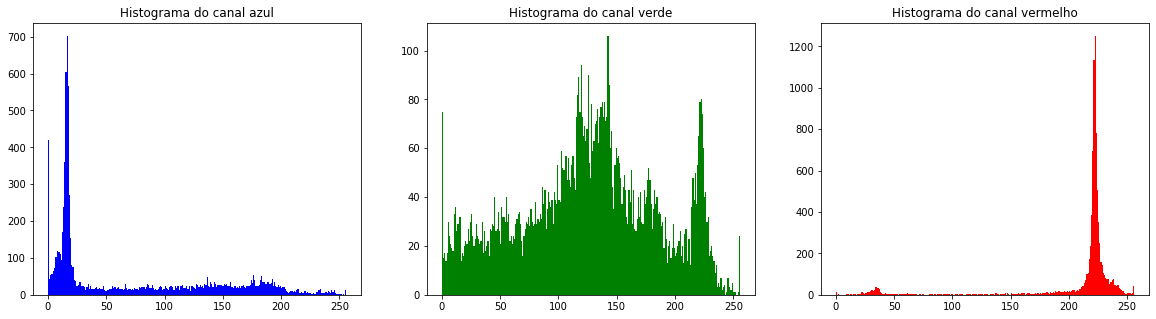

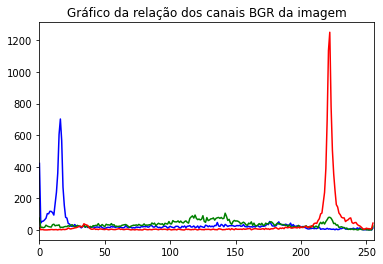

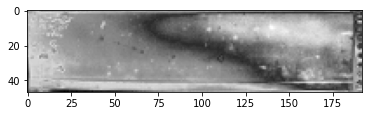

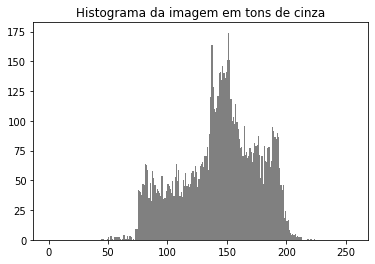

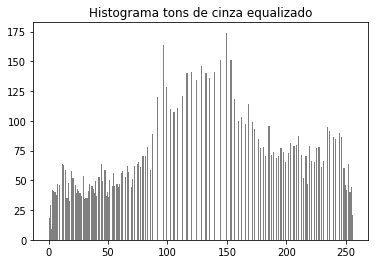

Path da imagem lida
/content/drive/MyDrive/Cortes/Teste/Corte_Cor09_BaixoLiso1.png
Mostrando as imagens coloridas e tons de cinza


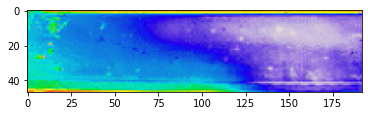

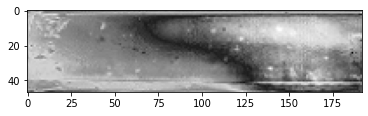

Mostra os dados estatísticos = dimensão, valores máximos e mínimos
Dimensões da imagem: alt x larg  

(47, 192)
Valor máximo da imagem   

0.8783412
Valor mínimo da imagem   

0.2108
Media 

(0.5726618322870753, 0.0, 0.0, 0.0)
Variancia 

Mediana 

0.5825608
Desvio Padrão 

0.13066436


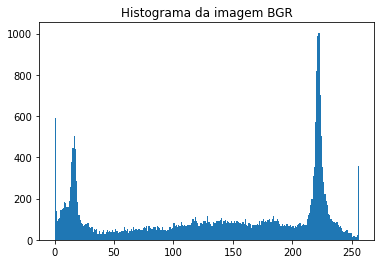

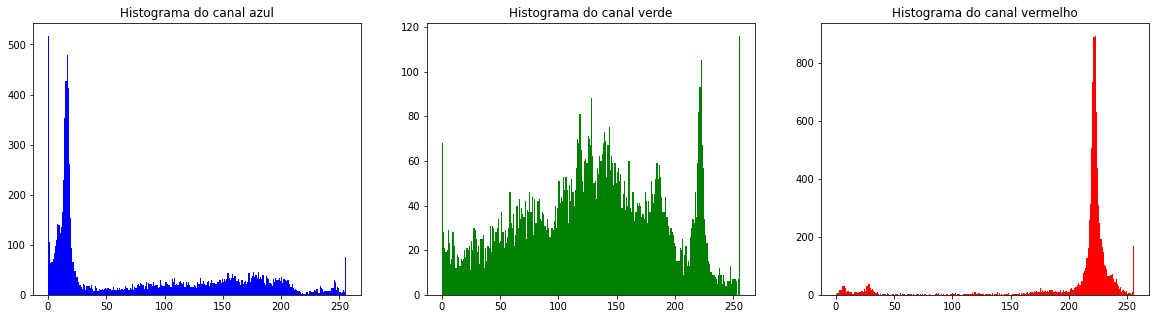

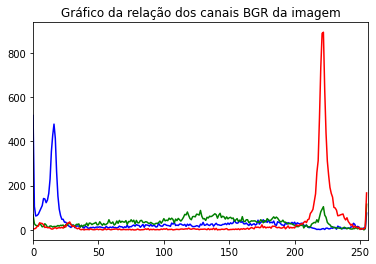

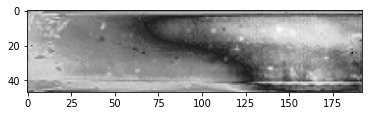

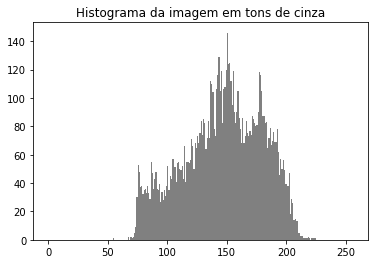

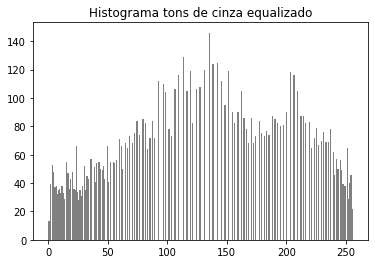

Path da imagem lida
/content/drive/MyDrive/Cortes/Teste/Corte_Cor09_ConchaGrande1.png
Mostrando as imagens coloridas e tons de cinza


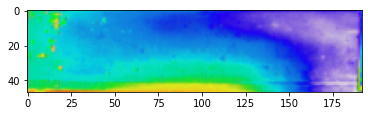

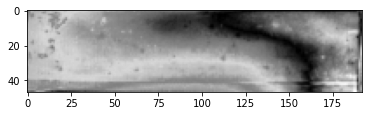

Mostra os dados estatísticos = dimensão, valores máximos e mínimos
Dimensões da imagem: alt x larg  

(47, 192)
Valor máximo da imagem   

0.84609413
Valor mínimo da imagem   

0.29659215
Media 

(0.5959567100120088, 0.0, 0.0, 0.0)
Variancia 

Mediana 

0.6185726
Desvio Padrão 

0.12204673


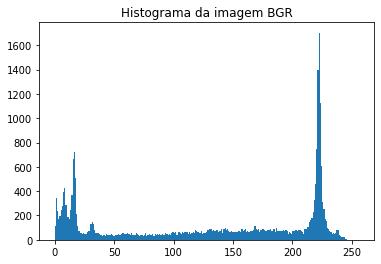

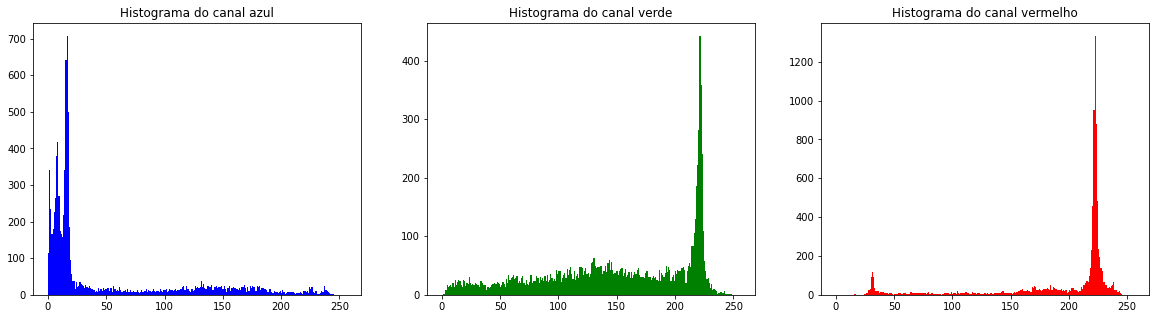

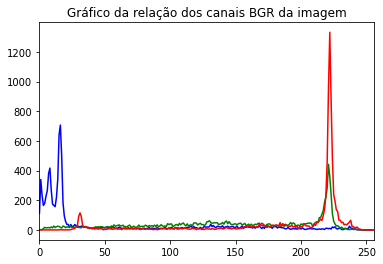

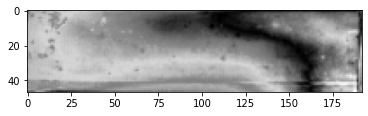

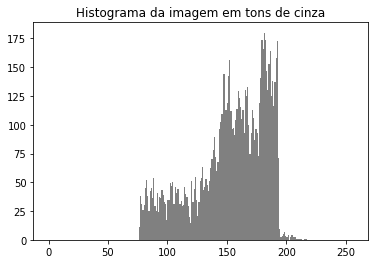

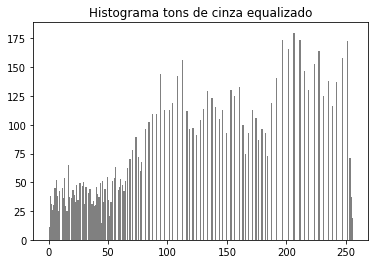

Path da imagem lida
/content/drive/MyDrive/Cortes/Teste/Corte_Cor09_MedioInclDir1.png
Mostrando as imagens coloridas e tons de cinza


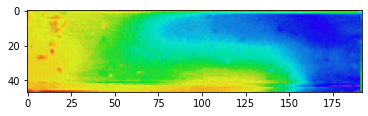

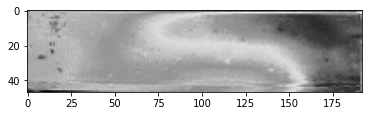

Mostra os dados estatísticos = dimensão, valores máximos e mínimos
Dimensões da imagem: alt x larg  

(47, 192)
Valor máximo da imagem   

0.8514706
Valor mínimo da imagem   

0.18171373
Media 

(0.5875749823452363, 0.0, 0.0, 0.0)
Variancia 

Mediana 

0.6137608
Desvio Padrão 

0.11389429


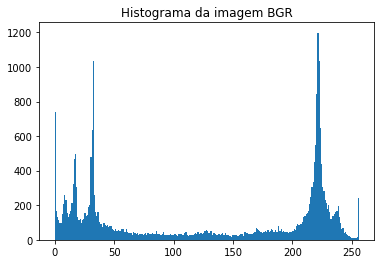

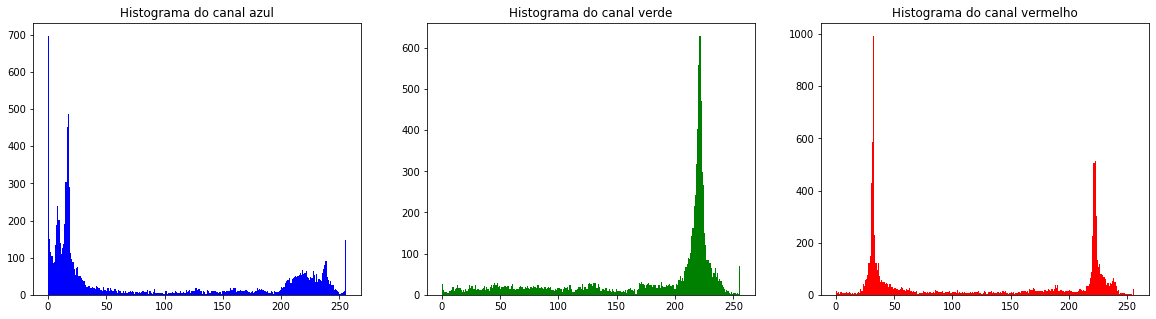

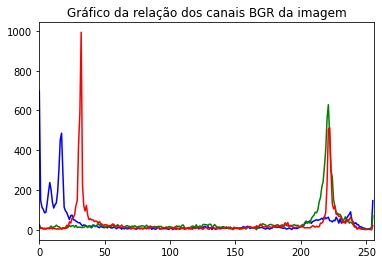

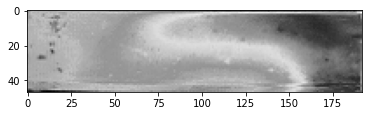

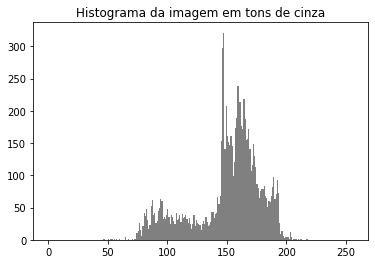

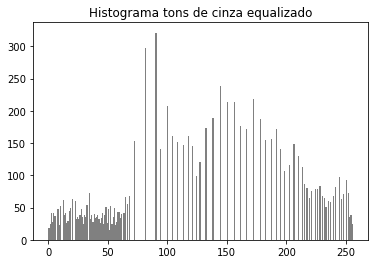

Path da imagem lida
/content/drive/MyDrive/Cortes/Teste/Corte_Cor09_MedioInclEsq1.png
Mostrando as imagens coloridas e tons de cinza


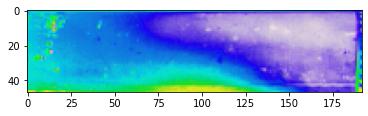

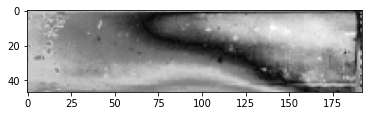

Mostra os dados estatísticos = dimensão, valores máximos e mínimos
Dimensões da imagem: alt x larg  

(47, 192)
Valor máximo da imagem   

0.8821765
Valor mínimo da imagem   

0.26961568
Media 

(0.6002023877800567, 0.0, 0.0, 0.0)
Variancia 

Mediana 

0.62024903
Desvio Padrão 

0.13433978


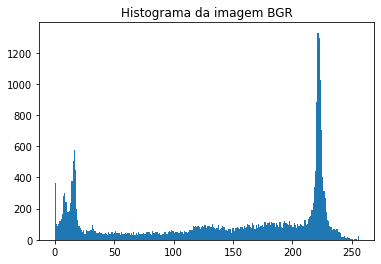

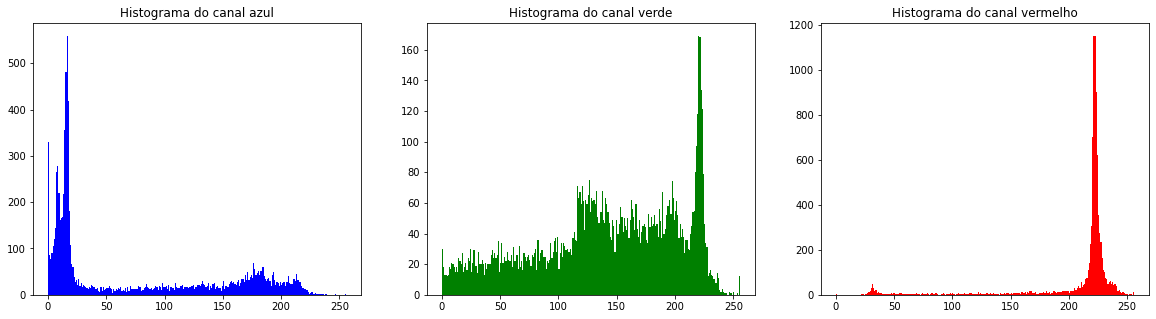

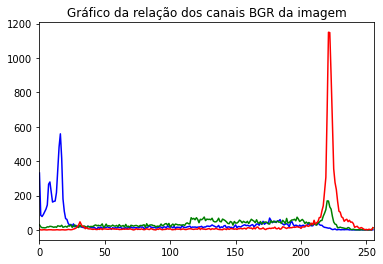

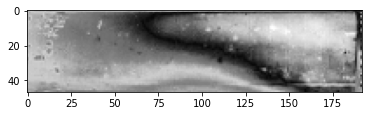

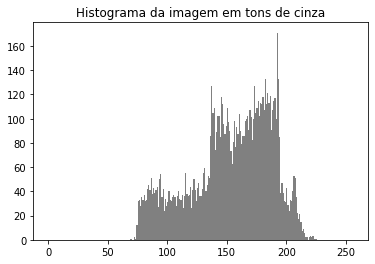

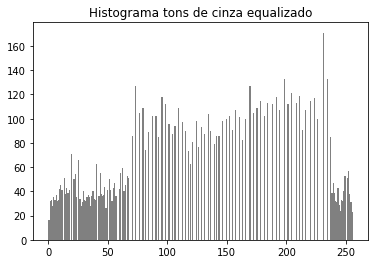

In [50]:
for img in img_names:
    print("Path da imagem lida")
    print(img)

    print("Mostrando as imagens coloridas e tons de cinza")
    img_cor   = imgShow(img, 1) #colorida
    img_cinza = imgShow(img, 0) #tons de cinza

    print("Mostra os dados estatísticos = dimensão, valores máximos e mínimos")
#   Dimensões da imagem
    imgDim(img_cinza)

#   Media dos valores da imagem
    imgMedia(img_cinza)

#   Variancia dos valores da imagem
    imgVariancia(img_cinza)

#   Mediana dos valores da imagem
    imgMediana(img_cinza)

#   Desvio Padrão dos valores da imagem
    imgDesvio(img_cinza)

#   Moda dos valores da imagem
#    imgModa(img_cinza)
    
#   Histogramas
    imgHistograma(img_cor,1)
    imgHistogramChanel(img_cor)
    imgHistogramaLinhas(img_cor)
    imgHistograma(img_cor,0)
    imgEqualize(img_cor)


# Tratar imagens OBJ.


 
